# About Dataset

This dataset has been taken from kaggle and our aim is to predict what sorts of people are likely to have a heart disease.

1. age
2. sex(1-male 0-female)
3. cp( Chest pain) | 0: asymptotic, 1: atypical angina, 2: non-anginal pain, 3: typical angina
4. trestbps(resting blood pressure | (in mm Hg on admission to the hospital))
5. chol(serum cholestoral in mg/dl)
6. fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg(resting electrocardiographic results | 0: showing probable or definite left ventricular hypertrophy by Estes' criteria , 1: normal, 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
8. thalach(maximum heart rate achieved)
9. exang(exercise induced angina (1 = yes; 0 = no))
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment(0: downsloping; 1: flat; 2: upsloping)
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: | 1 = fixed defect; 2 = normal; 3 = reversable defect
14. target (yes = 1(>50% chance of having the disease), no=0(<50% chance of having disease))

# Libraries to be imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Predicting heart disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print("Dimensions")
print("No of rows",data.shape[0])
print("No of columns",data.shape[1])

Dimensions
No of rows 303
No of columns 14


In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Categorical Variables in the Dataset

 sex, cp, fbs, restecg, exang, slope, thal

##  Numeric Variables in Dataset

age, trestbps, chol, thalach, oldpeak, ca

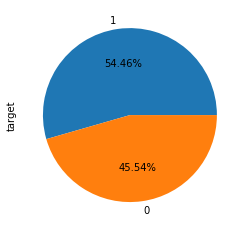

In [6]:
data.target.value_counts().plot.pie(autopct="%0.2f%%")

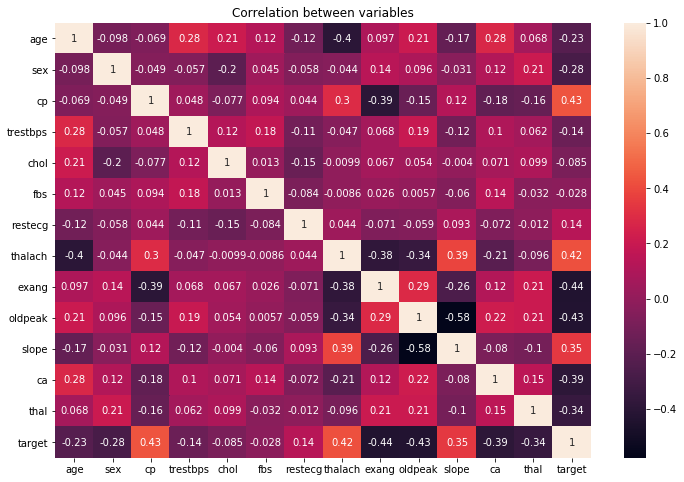

In [7]:
plt.figure(figsize=(12,8))
plt.title('Correlation between variables')
sns.heatmap(data.corr(),annot=True)

## Filling missing data

In [8]:
camode=data.ca.mode()
thalmode=data.thal.mode()
print(camode)
print(thalmode)

0    0
dtype: int64
0    2
dtype: int64


In [10]:
data.ca.fillna(0,inplace=True)
data.thal.fillna(2,inplace=True)

In [11]:
data.isna().sum()
#no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Visualising relation of variables with target variable.

### Age

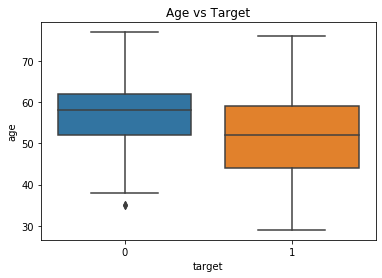

In [12]:
plt.title('Age vs Target')
sns.boxplot(x='target',y='age',data=data)

### Gender

C:\Users\Ishan Srivastava\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


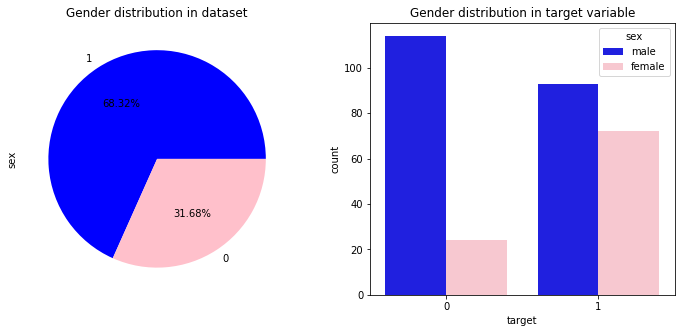

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Gender distribution in dataset')
data.sex.value_counts().plot.pie(autopct="%0.2f%%",colors=['blue','pink'])
df=data.iloc[:,[1,13]]
plt.subplot(122)
df['sex'].replace({1:'male',0:'female'},inplace=True)
plt.title('Gender distribution in target variable')
sns.countplot(x='target',data=df,hue='sex',palette=['blue','pink'])

### Chest pain type

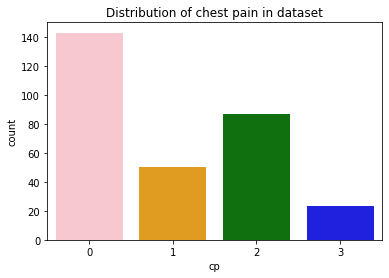

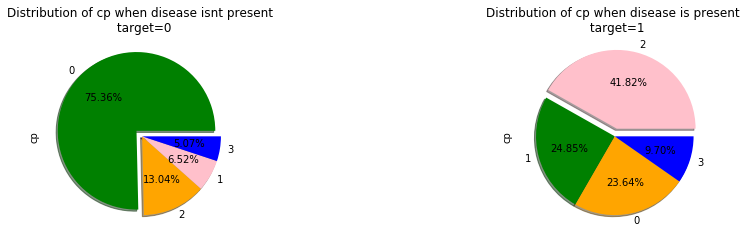

In [14]:
plt.title('Distribution of chest pain in dataset')
sns.countplot(x='cp',data=data,palette=['pink','orange','green','blue'])
plt.figure(figsize=(12,8))
df=data.groupby(['target'])['cp'].value_counts()
plt.subplot(131)
explode=(0.1,0,0,0)
df[0].plot.pie(autopct="%0.2f%%",colors=['green','orange','pink','blue'],explode=explode,shadow=True)
plt.title("Distribution of cp when disease isnt present \n target=0")
plt.subplot(133)
plt.title("Distribution of cp when disease is present \n target=1")
explode=(0.1,0,0,0)
df[1].plot.pie(autopct="%0.2f%%",colors=['pink','green','orange','blue'],explode=explode,shadow=True)

### trestbps

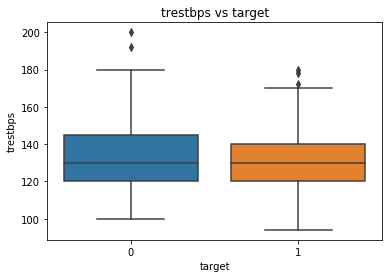

In [15]:
plt.title('trestbps vs target')
sns.boxplot(x='target',y='trestbps',data=data)